# Face Recognition with OpenCV in Python

This notebook covers how to apply face recognition with regular OpenCV. 

Notice that these **ARE NOT** state-of-the-art techniques anymore. Deep learning based approaches overperform than these legacy techniques. You might consider to read this blog post to learn deep learning based face recognition pipelines: [**A Gentle Introduction to Face Recognition in Deep Learning**](https://sefiks.com/2020/05/01/a-gentle-introduction-to-face-recognition-in-deep-learning/)

In [ ]:
#!pip install --user opencv-contrib-python#==4.3.0.36

In [1]:
import numpy as np
import cv2 #4.2.0
import os
import matplotlib.pyplot as plt

In [2]:
print("My OpenCV version is: ", cv2.__version__)

My OpenCV version is:  4.3.0


OpenCV requires opencv-contrib-python module to be installed to run face recongition tasks. Check this module is installed on your environment.

In [3]:
import pkg_resources
installed_packages = pkg_resources.working_set
installed_packages_list = sorted(["%s==%s" % (i.key, i.version) for i in installed_packages])

is_installed = False
for installation in installed_packages_list:
    package, version = installation.split("==")
    
    if 'opencv-contrib-python' == package:
        is_installed = True
        break

if is_installed != True:
    raise ValueError("opencv-contrib-python is not installed on your environment. Please run pip install --user opencv-contrib-python command.")

# Load OpenCV haarcascade

In [4]:
opencv_home = cv2.__file__
folders = opencv_home.split(os.path.sep)[0:-1]
path = folders[0]
for folder in folders[1:]:
    path = path + "/" + folder

face_detector_path = path+"/data/haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(face_detector_path);

# Build face recognition model

In [5]:
model = cv2.face.LBPHFaceRecognizer_create() #Local Binary Patterns Histograms
#model = cv2.face.EigenFaceRecognizer_create()
#model = cv2.face.FisherFaceRecognizer_create()

# Load face data set

In [6]:
def detect_face(img_path):
    img = cv2.imread(img_path)
    
    detected_faces = faceCascade.detectMultiScale(img, 1.3, 5)
    x, y, w, h = detected_faces[0] #focus on the 1st face in the image
    
    img = img[y:y+h, x:x+w] #focus on the detected area
    img = cv2.resize(img, (224, 224))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    return img

In [7]:
face_db = [
    "deepface/tests/dataset/img1.jpg",
    "deepface/tests/dataset/img3.jpg",
    "deepface/tests/dataset/img8.jpg",
    "deepface/tests/dataset/img13.jpg",
    "deepface/tests/dataset/img30.jpg",
    "deepface/tests/dataset/img44.jpg"
]

In [8]:
faces = []
for img_path in face_db:  
    print(img_path)
    img = detect_face(img_path)
    faces.append(img)

deepface/tests/dataset/img1.jpg
deepface/tests/dataset/img3.jpg
deepface/tests/dataset/img8.jpg
deepface/tests/dataset/img13.jpg
deepface/tests/dataset/img30.jpg
deepface/tests/dataset/img44.jpg


In [9]:
ids = np.array([i for i in range(0, len(faces))])

# Train model or load if it is trained already

In [10]:
pre_built_model = "pre-built-model.yml"

model.train(faces, ids)
model.save(pre_built_model)

#if you already trained the model before, you do not have to retrain it anymore.
#model.read(pre_built_model)

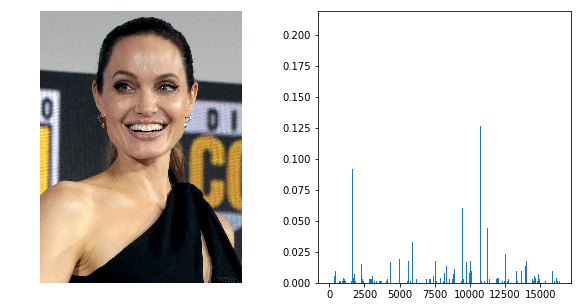

-----------------------


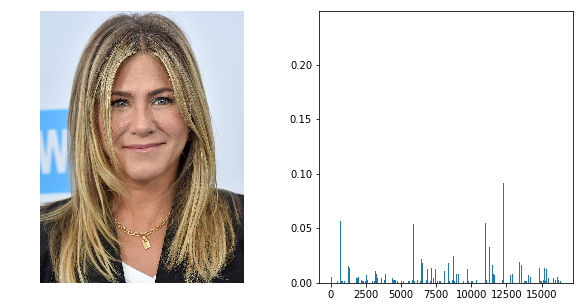

-----------------------


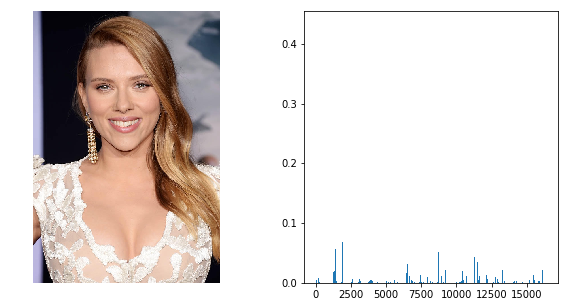

-----------------------


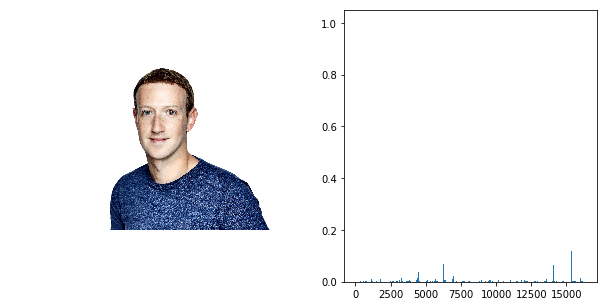

-----------------------


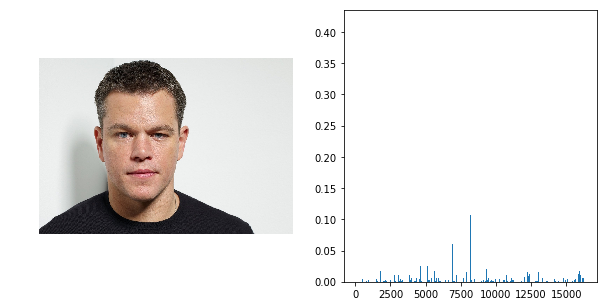

-----------------------


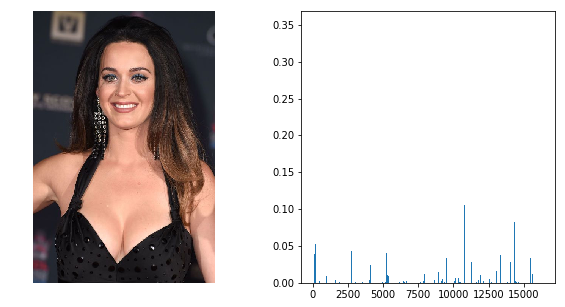

-----------------------


In [11]:
if True:
    histograms = model.getHistograms()

    for i in range(0, len(face_db)):
        histogram = histograms[i][0]
        
        #histogram = histogram[0:100]
        
        axis_values = np.array([i for i in range(0, len(histogram))])

        fig = plt.figure(figsize=(10, 5))
        
        ax1 = fig.add_subplot(1,2,1)
        plt.imshow(cv2.imread(face_db[i])[:,:,::-1])
        plt.axis('off')
        
        ax1 = fig.add_subplot(1,2,2)
        plt.bar(axis_values, histogram)
        plt.show()
        print("-----------------------")

# Find a face in the face database

In [27]:
def displayHistogram(target_file):
    img = detect_face(target_file)
    tmp_model = cv2.face.LBPHFaceRecognizer_create()
    tmp_model.train([img], np.array([0]))
    
    histogram = tmp_model.getHistograms()[0][0]
    #histogram = histogram[0:100]
    axis_values = np.array([i for i in range(0, len(histogram))])
    
    plt.bar(axis_values, histogram)
    plt.show()

def findFace(target_file):
    
    img = detect_face(target_file)
    #print(img.shape)
    
    idx, confidence = model.predict(img)
    
    fig = plt.figure()

    ax1 = fig.add_subplot(1,2,1)
    #plt.imshow(img[:,:,::-1])
    plt.imshow(cv2.imread(target_file)[:,:,::-1])
    plt.axis('off')

    ax1 = fig.add_subplot(1,2,2)
    #plt.imshow(faces[id], cmap='gray')
    plt.imshow(cv2.imread(face_db[idx])[:,:,::-1])
    plt.axis('off')

    plt.show()
    
    print("Confidence: ", round(confidence, 2))

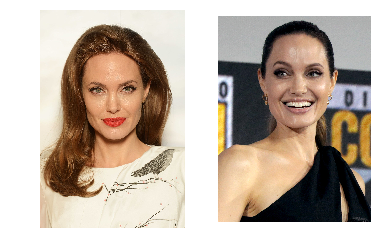

Confidence:  53.42


In [28]:
findFace("deepface/tests/dataset/img7.jpg")

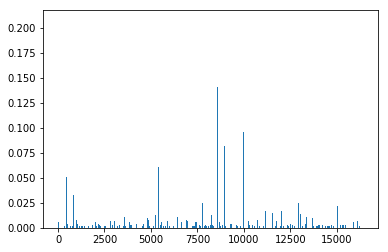

In [29]:
displayHistogram("deepface/tests/dataset/img7.jpg")

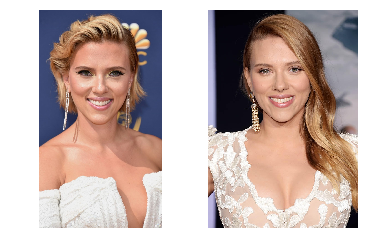

Confidence:  55.06


In [30]:
findFace("deepface/tests/dataset/img9.jpg")

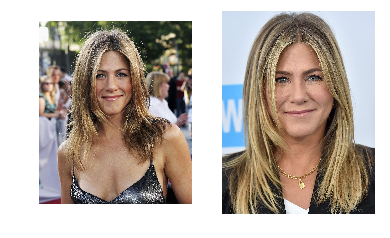

Confidence:  47.28


In [31]:
findFace("deepface/tests/dataset/img54.jpg")

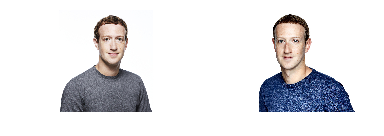

Confidence:  70.83


In [32]:
findFace("deepface/tests/dataset/img14.jpg")

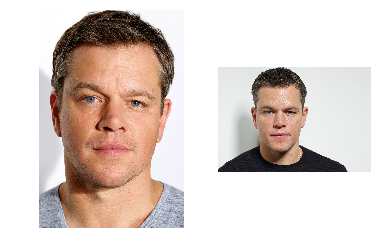

Confidence:  53.39


In [33]:
findFace("deepface/tests/dataset/img32.jpg")

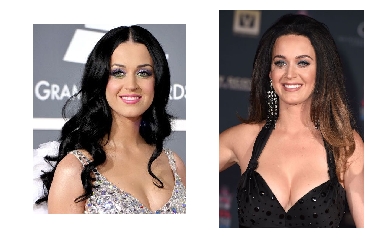

Confidence:  55.43


In [34]:
findFace("deepface/tests/dataset/img46.jpg")